# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


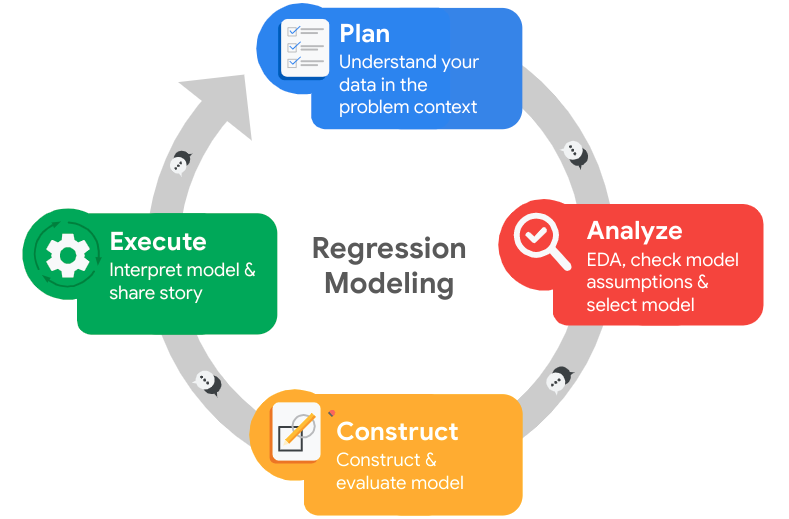

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- The main audience for this project would be the leadership team at Salifort Motors.
- I am trying to build a model that can successfully predict whether an employee is likely to quit. Due to it being time-consuming and expensive to find new employees for the company, this will ideally save the company both time and money by implementing necessary interventions.
- Why is the employee turnover rate so high?
- The survey data from the HR department and the code notebooks completed throughout this course.
- An ML Model, EDA findings, Visualizations


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [8]:
# Gather basic information about the data
df0.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Gather descriptive statistics about the data

In [11]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [15]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [17]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [21]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [25]:
# Check for duplicates
df0.duplicated().sum()


3008

In [27]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [29]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [123]:
df0['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

### Check outliers

Check for outliers in the data.

<Axes: title={'center': 'Boxplot to detect outliers for tenure'}, xlabel='tenure'>

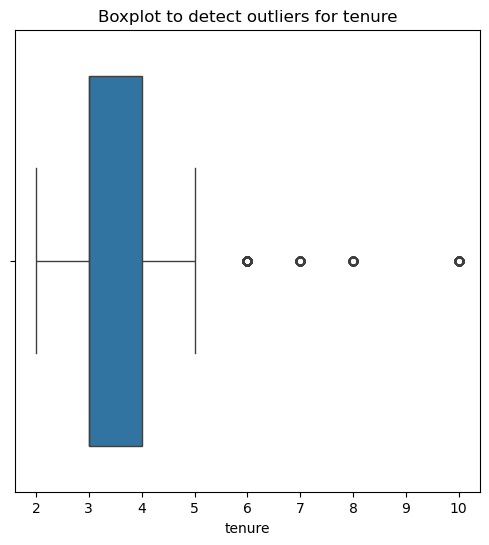

In [33]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
sns.boxplot(x=df1['tenure'])

In [35]:
# Determine the number of rows containing outliers
percentile25 = df1['tenure'].quantile(0.25)

percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?





* There appears to be a correlation between `last_evaluation`, `average_monthly_hours`, and `number_project`. 
* It also appears that the employees at this company are overworked.
* Most distributions appear to be fairly even, however, shorter tenured employees appear to be more likely to leave the company.
* Not many transofrmations were made here. The `tenure` column was split into short-tenure and long-tenure in order to look at salary differences.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [42]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, "Distribution of Employee's Number of Projects")

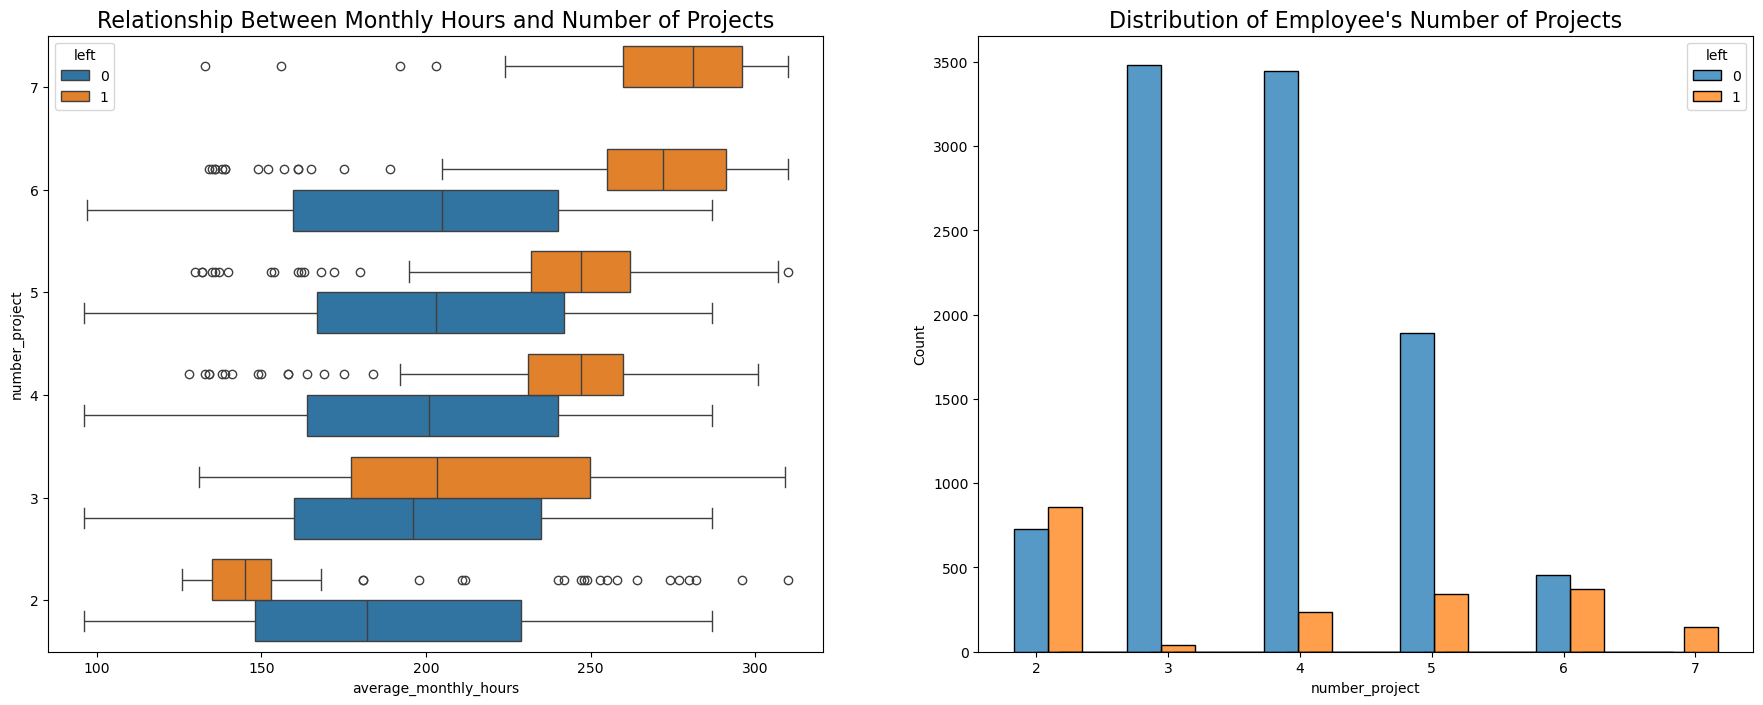

In [46]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create a box plot showing the average_monthly_hours based on the number of projects, comparing employees that left with those who stayed.
sns.boxplot(data=df1, x='average_monthly_hours', y = 'number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Relationship Between Monthly Hours and Number of Projects', fontsize =16)

# Create histogram showing number of projects for employees that stayed versus those who left
tenure_stay = df1[df1['left'] == 0]['number_project']
tenure_left = df1[df1['left'] == 1]['number_project']
sns.histplot(data=df1, x='number_project', multiple='dodge', shrink=3, hue='left', ax=ax[1])
ax[1].set_title("Distribution of Employee's Number of Projects", fontsize=16)

Important notes about the above plot:
* Individuals who were assigned to the same number of projects as their peers but worked more monthly hours than their peers appear to have left the company, apart from 2 project employees.
  * It is possible that these employees were fired.
* Every employee that was assigned to 7 projects ended up leaving the company.
* The company seems to have majority of its current employment staff working either 3-4 projects, this could indicate an ideal number of projects to be working.
* If you assume the average employee works 40 hour weeks with two weeks of vacation, then that would equate to 167 hours worked per month. It appears that majority of employees (noe employees assigned to two projects) are working more than that, this could indicate that a lot of employees are overworked.

In [49]:
df1[df1['number_project'] == 7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

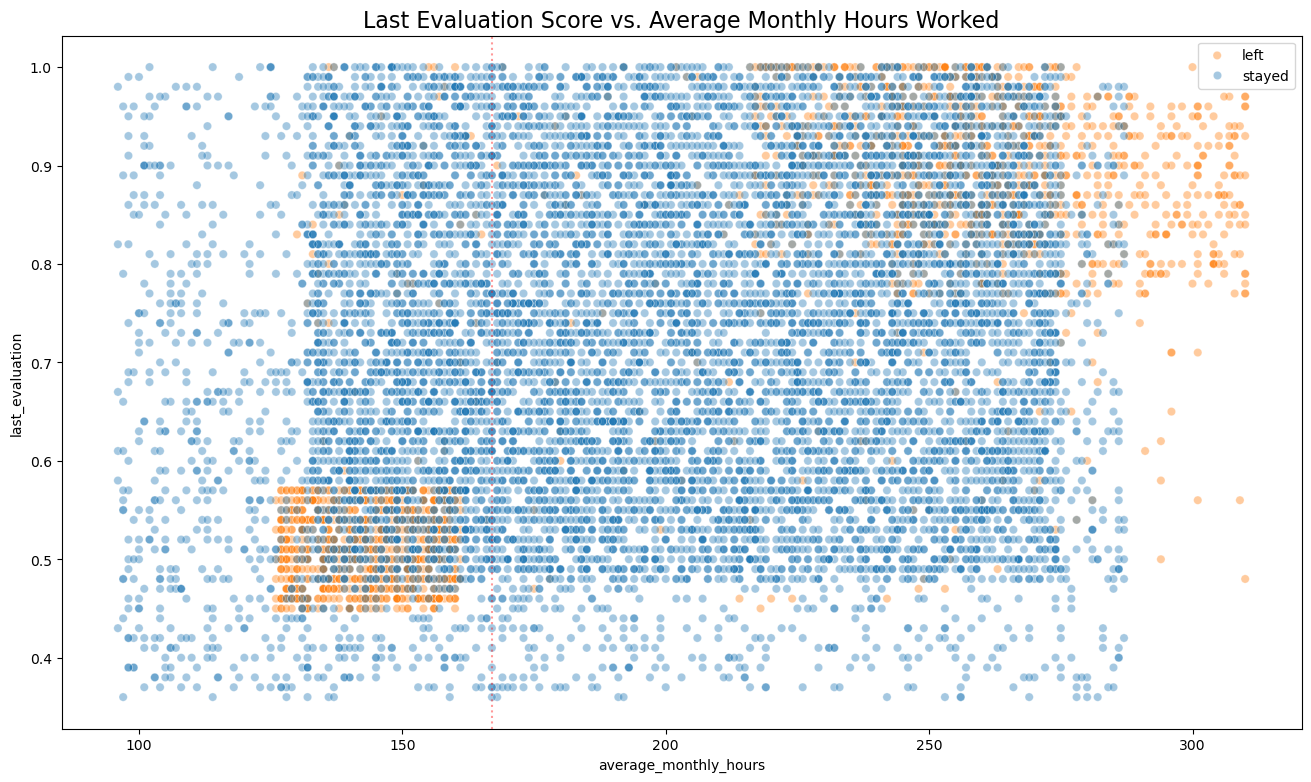

In [63]:
# Create a plot as needed
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=167, color='red', label = '167 hrs/mo.', ls=':', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Satisfaction Level vs. Average Monthly Hours Worked', fontsize=16)
plt.show()

Important findings from the above graph:
* There was a group of employees who worked between 240 and 310 hours that had very low staisfaction levels (~0.15), most of these employees left the company.
* Another group of employees was seen to work a more standard number of hours (130-160) but still have low satisfaction levels (~0.4), most of these employees left the company. The reason for why these employees left the company remains unclear.
* A third group of employees who left the company can be seen who worked between 210 and 280 hours with satisfaction levels between 0.7 and 0.9, it is again unclear why these employees left the company.

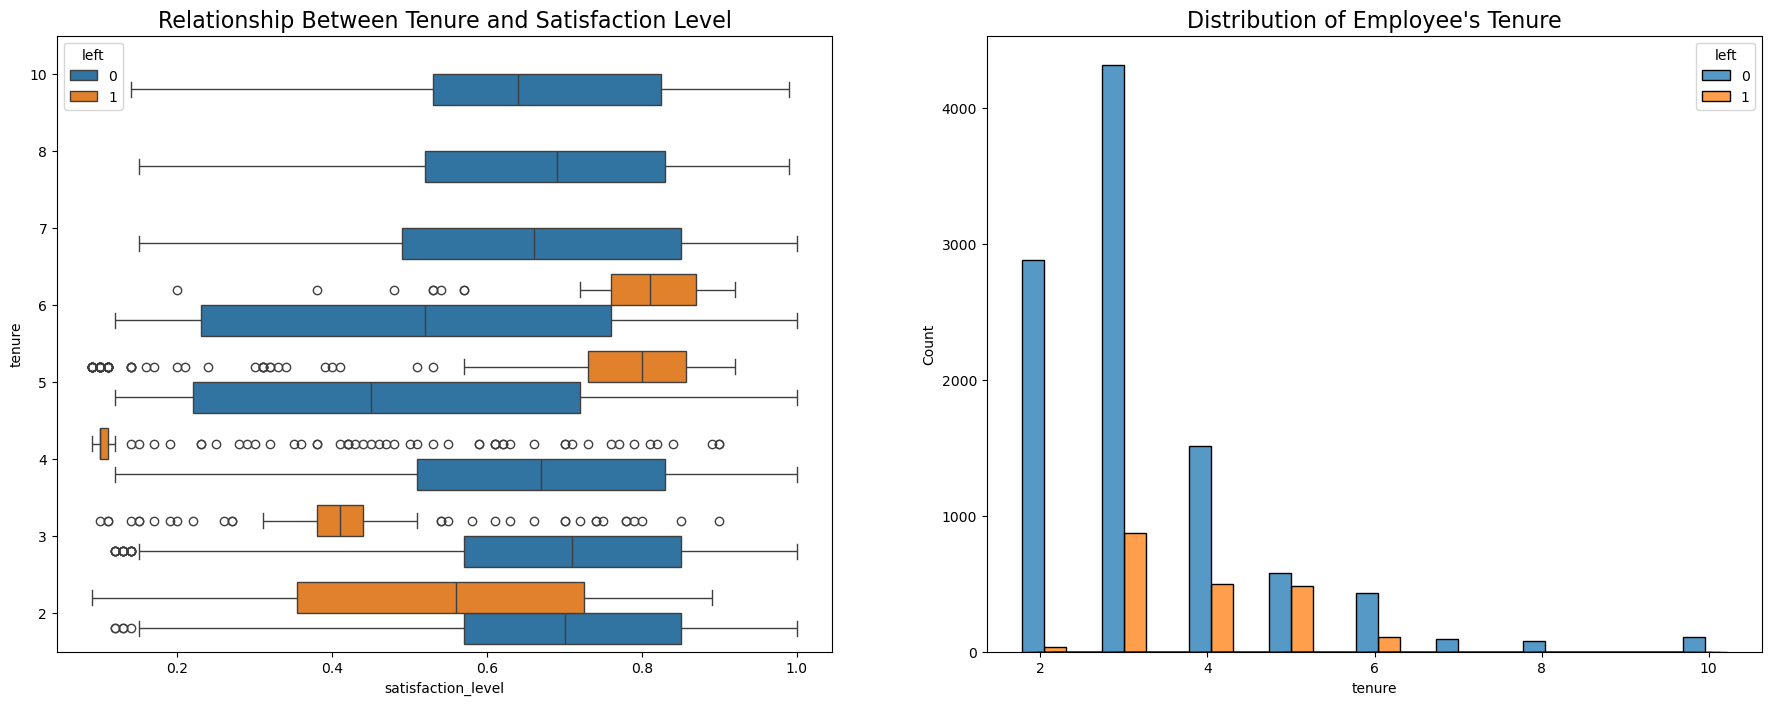

In [54]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create a box plot showing the satifaction level of employees based on their tenure, comparing employees that left with those who stayed.
sns.boxplot(data=df1, x='satisfaction_level', y = 'tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Relationship Between Tenure and Satisfaction Level', fontsize =16)

# Create histogram showing tenure for employees that stayed versus those who left
tenure_stay = df1[df1['left'] == 0]['tenure']
tenure_left = df1[df1['left'] == 1]['tenure']
sns.histplot(data=df1, x='tenure', multiple='dodge', shrink=6, hue='left', ax=ax[1])
ax[1].set_title("Distribution of Employee's Tenure", fontsize=16)

plt.show()

Important findings from the above graph:
* After an employee has been with the company for 7 or more years, they do not appear to leave company, however, only a small number of the company has been there for 7 or more years. These individuals could be high ranking and high paid employees.
* Employees who left were either very satisfied employess with 5-6 year tenures or dissatisfied to mildly staisfied employees who had 2-4 year tenures.
* Year 4 employees who left had a strinkingly low satisfaction level.

In [57]:
# Determine the mean and median satisfaction levels for employees that left versus those that did not.
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


/var/folders/lx/0p5ld8hd78b9ypyfr63qsf5c0000gn/T/ipykernel_1190/1659301286.py:2: FutureWarning: The provided callable <function mean at 0x112e2e840> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])
/var/folders/lx/0p5ld8hd78b9ypyfr63qsf5c0000gn/T/ipykernel_1190/1659301286.py:2: FutureWarning: The provided callable <function median at 0x112f65f80> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean satisfaction level for employees who left was found to be 0.440271, while for employees that stayed the mean satisfaction level was found to be 0.667365 a difference of ~0.22. The median satisfaction score for employees who left was 0.41, while for employees that stayed the median was 0.69. This is expected as employees who leave are likely to be dissatisfied with their job, note however, that the mean staisfaction level for employees who stayed is less than the median.

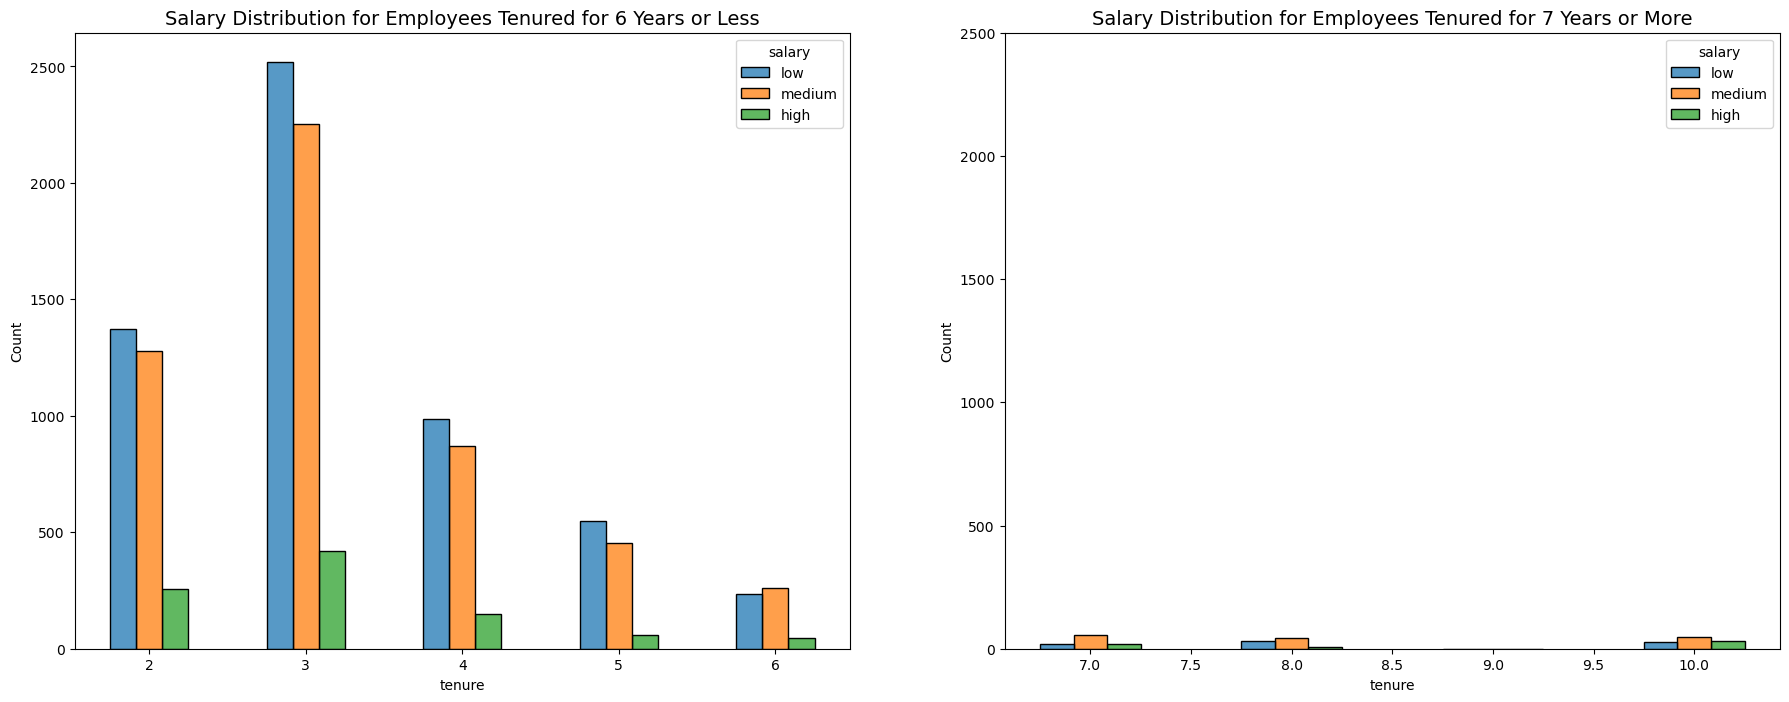

In [60]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))

tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

sns.histplot(data=tenure_short, x = 'tenure', hue = 'salary', discrete = 1,
             hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink =.5, ax = ax[0])
ax[0].set_title('Salary Distribution for Employees Tenured for 6 Years or Less', fontsize=14)

sns.histplot(data=tenure_long, x = 'tenure', hue = 'salary', discrete = 1,
             hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink =.5, ax = ax[1])
ax[1].set_title('Salary Distribution for Employees Tenured for 7 Years or More', fontsize=14)
plt.ylim(0, 2500)

plt.show()

Important findings from the above graph:
* There does not appear to be a discrepancy related to tenure and corresponding employee salary.

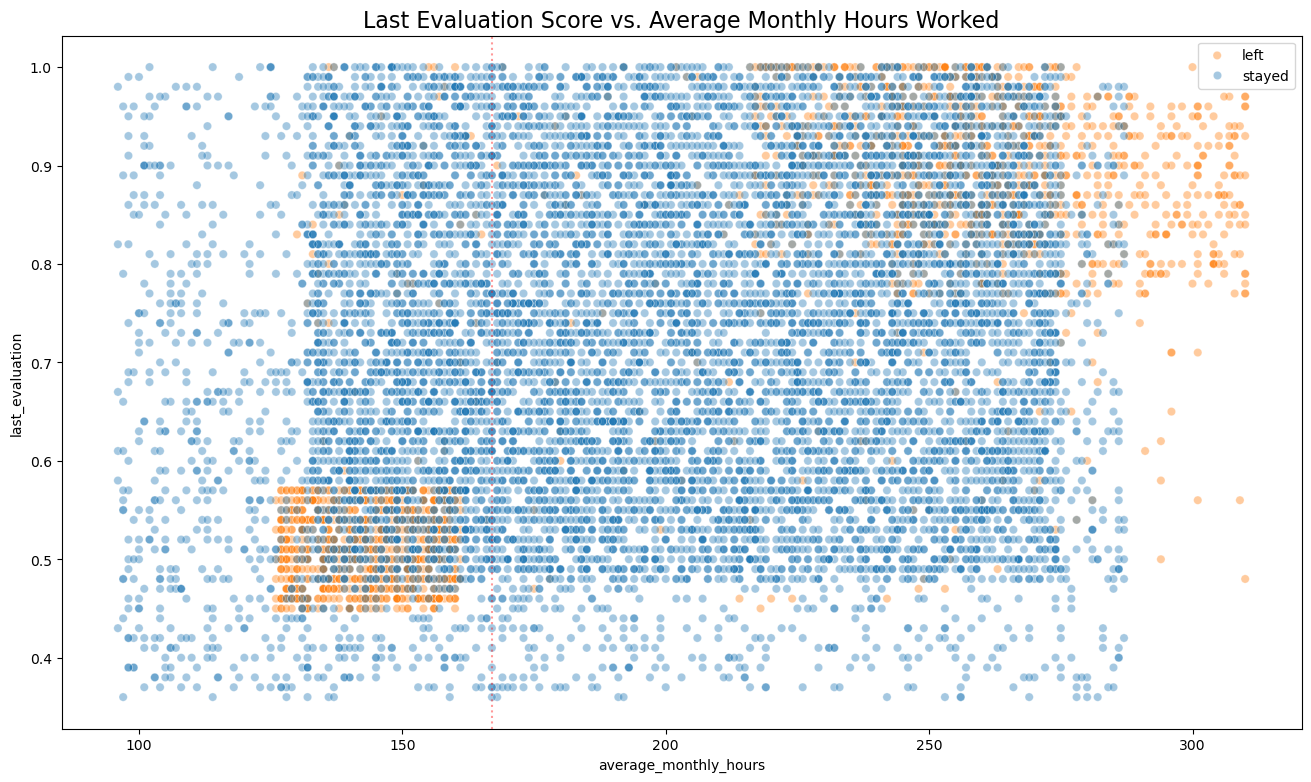

In [73]:
# Create a plot as needed
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=167, color='red', label = '167 hrs/mo.', ls=':', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Last Evaluation Score vs. Average Monthly Hours Worked', fontsize=16)
plt.show()


Important notes about the above graph:
* There are two main groups corresponding to employees that left the company: the first group are those who worked high number of monthly hours and received high evaluation scores and those who worked a lower number of monthly hours and received lower evaluation scores.
* Working long hours does not necessarily guarantee a high evaluation score.

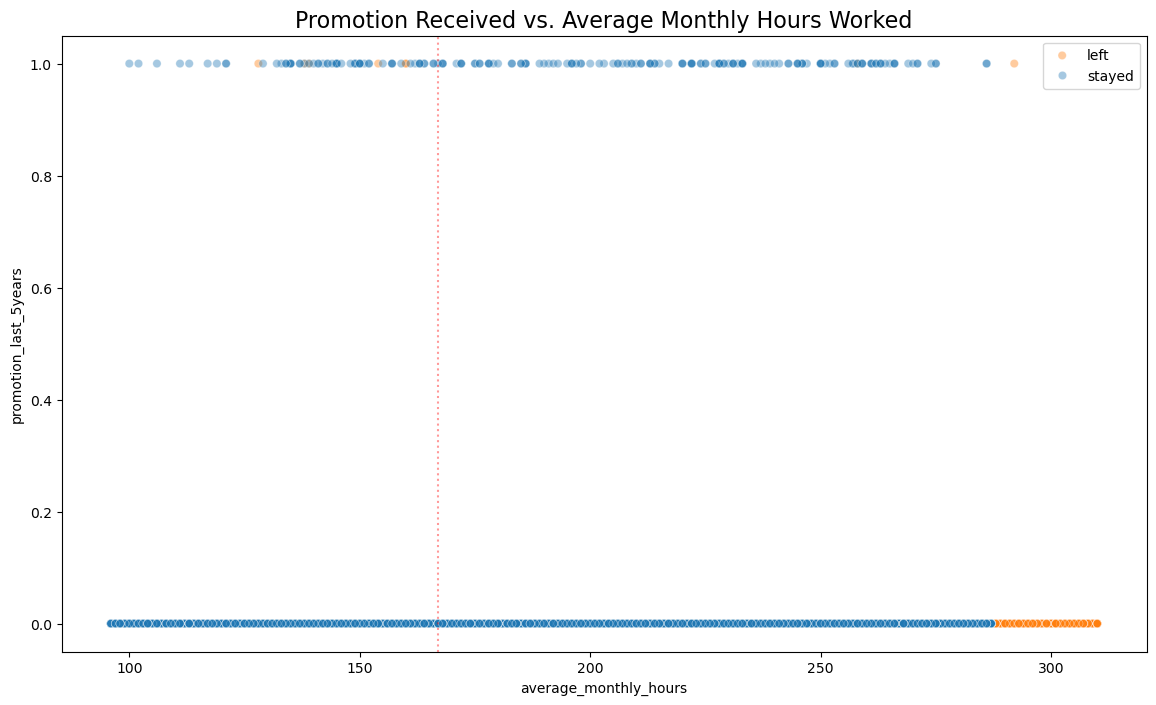

In [78]:
# Create a plot as needed
plt.figure(figsize=(14,8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=167, color='red', label = '167 hrs/mo.', ls=':', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Promotion Received vs. Average Monthly Hours Worked', fontsize=16)
plt.show()


Important notes about this graph:
* It looks like a small number of employees who were promoted left the company.
* Very few employees who worked long hours were promoted.
* All of the employees who did not receive a promotion and worked the longest hours left the company.

In [81]:
# Display employee counts for each department
df1['department'].value_counts()


department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

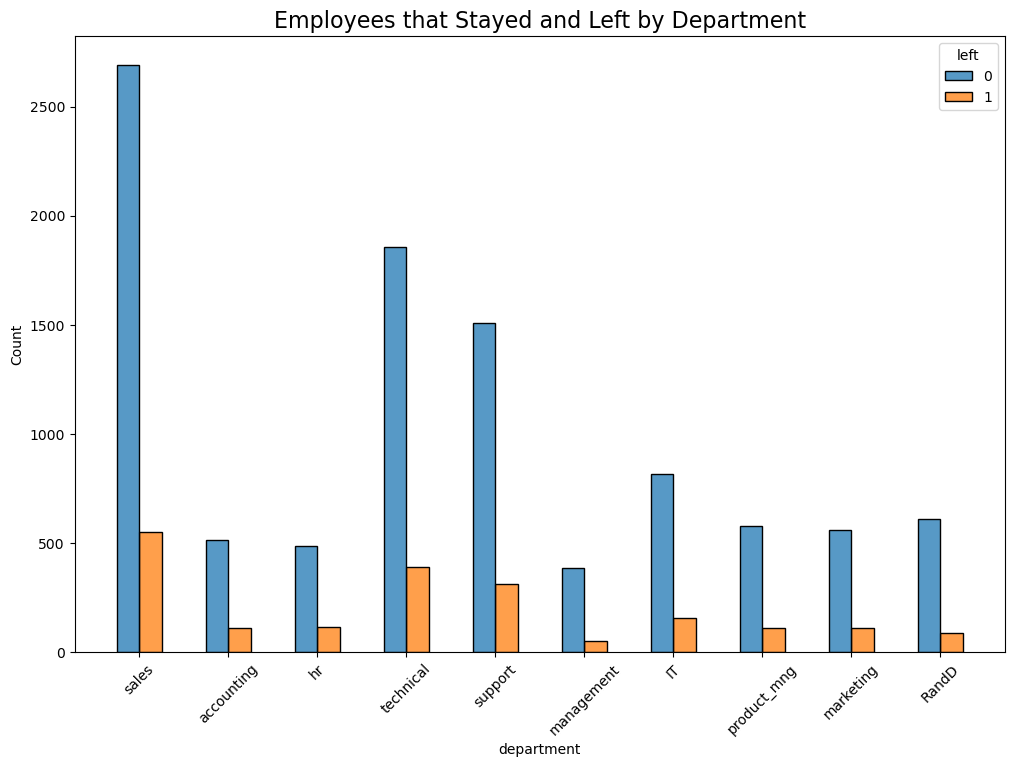

In [93]:
# Show distribution of departments
plt.figure(figsize=(12,8))
sns.histplot(data=df1, x = 'department', hue = 'left',
             hue_order = [0, 1], multiple = 'dodge', shrink =.5)
plt.xticks(rotation=45)
plt.title('Employees that Stayed and Left by Department', fontsize=16)

plt.show()

Important notes about this graph:
* There does not appear to be a department that has higher turnover than any other.

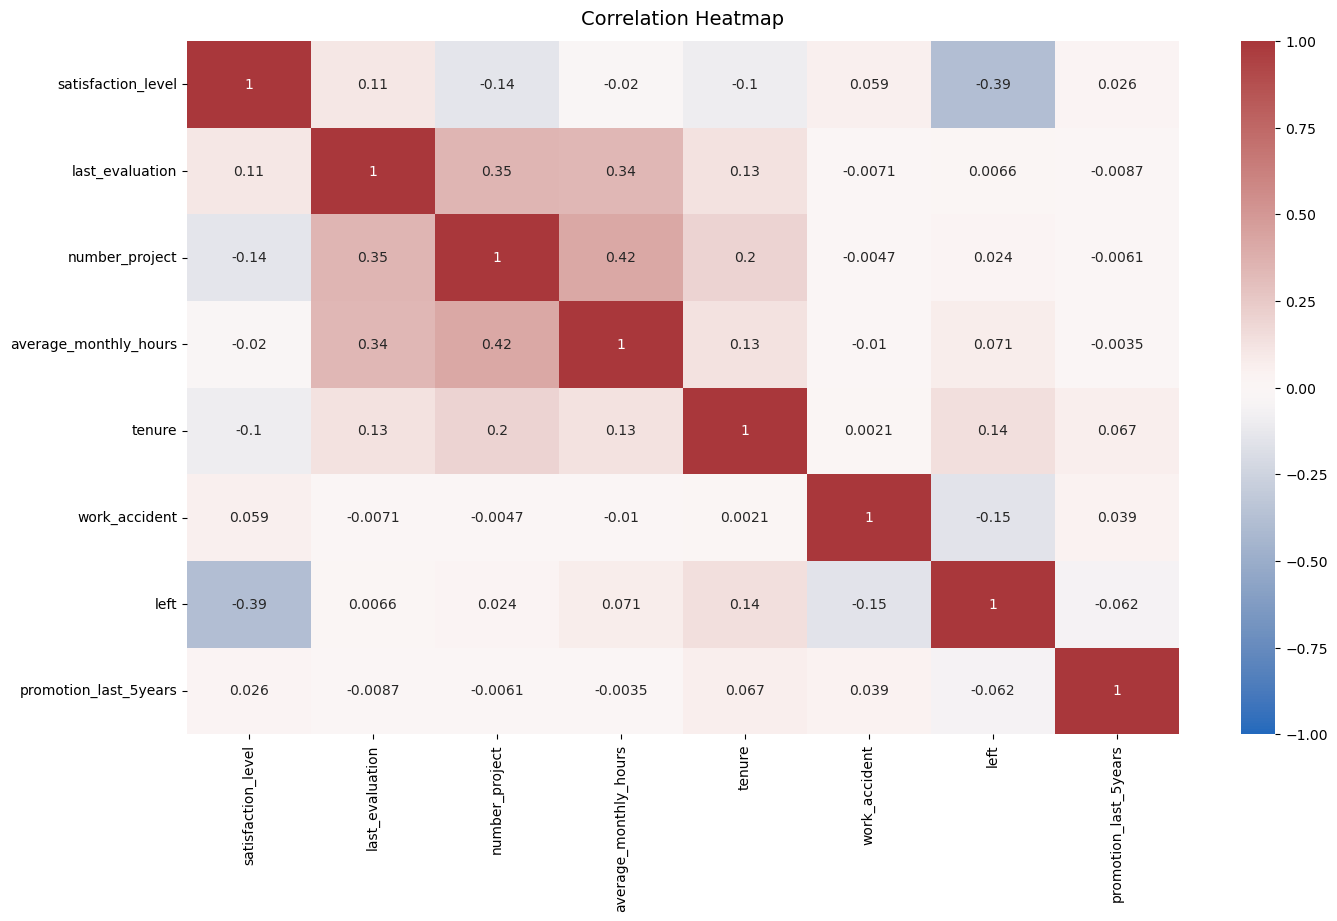

In [108]:
df2 = df0.copy()
df2 = df2.drop(labels=['department', 'salary'], axis=1)
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Important notes about this graph:
* There are positive correlations between `average_monthly_hours`, `number_project`, and `evaluation_score`.
* There is a negative correlation between `satisfaction_level` and `left`.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?




* I didn't notice anything particularly odd during the above data exploration.
* All variables apart from `left` will be used as independent variables.
* A random forest model was used, assumptions are assumed to be met.
* The model fit the data exceptionally well as shown by validation and test scores.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Here we are trying to predict whether an employee will leave the company or not, thus, this is a binary classification task as we are attempting to classify whether an employee left or did not leave.

### Identify the types of models most appropriate for this task.

A binomial logistic regression model or a tree-based model can be used for this task. As tree-based models tend to perform better, a tree-based model will be used for modeling.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [167]:
# Create a copy of the original dataframe
df_mod = df0.copy()

df_mod['salary'] = (df_mod['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

df_mod = pd.get_dummies(df_mod, drop_first=False)                    

In [169]:
# Isolate the target variable
y = df_mod['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [253]:
df_mod.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [ ]:
y = df_mod['left']

In [177]:
# Isolate the independent variables
X = df_mod.drop('left', axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [179]:
# Import additional packages necessary for modeling
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.tree import plot_tree

import pickle

In [181]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=10)

In [183]:
rf = RandomForestClassifier(random_state=10)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [3, 5, None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'n_estimators': [100, 300]
}

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [185]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 18min 15s, sys: 7.05 s, total: 18min 22s
Wall time: 18min 43s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [191]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [222]:
path = '/Users/conorshanahan/Documents/Jupyter Files/Capstone Project/'

In [224]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [226]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path of folder where you want to read from
        saved_model_name: filename of pickled model being read in
        

    Out: 
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [228]:
# Pickle the RF model
write_pickle(path, rf_cv, 'hr_rf_cv')

In [230]:
rf1 = read_pickle(path, 'hr_rf_cv')

In [242]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   'auc': 'mean_test_roc_auc',
                   }

  # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc

  # Create table of results
    table = pd.DataFrame({
      'Model': [model_name],
      'F1': [f1],
      'Recall': [recall],
      'Precision': [precision],
      'Accuracy': [accuracy],
      'auc': [auc],  
  })
    return table

In [244]:
rf1_results = make_results('Random Forest CV', rf1, 'auc')
rf1_results

,Model,F1,Recall,Precision,Accuracy,auc
0,Random Forest CV,0.959128,0.929056,0.991279,0.981154,0.990683


In [246]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [248]:
rf1_test_scores = get_scores('Random Forest 1', rf1, X_test, y_test)
rf1_test_scores                           

,model,precision,recall,f1,accuracy,AUC
0,Random Forest 1,0.98556,0.917133,0.950116,0.977067,0.956467


### Random Forest - Round 2

In [255]:
df_rf2 = df_mod.drop('satisfaction_level', axis=1)

df_rf2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [263]:
df_rf2['overworked'] = df_rf2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df_rf2['overworked'].max())
print('Min hours:', df_rf2['overworked'].min())

Max hours: 310
Min hours: 96


Based on the average number of hours being worked a month by employees being 167 hrs/month, let's define being overworked as working more than 175 hours in a month.

In [266]:
df_rf2['overworked'] = (df_rf2['overworked'] > 175).astype(int)

df_rf2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [268]:
# Drop the `average_monthly_hours` column from the dataframe.
df_rf2 = df_rf2.drop('average_monthly_hours', axis=1)
df_rf2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [270]:
# Isolate the target variable
y = df_rf2['left']

# Isolate the feature variables
X = df_rf2.drop('left', axis=1)

In [272]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=10)

In [274]:
# Instantiate the model
rf = RandomForestClassifier(random_state=10)

# Create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [3, 5, None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'n_estimators': [100, 300]
}

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate the GridSearchCV object
rf_cv2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')


In [276]:
%%time
rf_cv2.fit(X_train, y_train)

CPU times: user 15min 58s, sys: 11.5 s, total: 16min 9s
Wall time: 17min 21s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [278]:
# Pickle the RF model
write_pickle(path, rf_cv2, 'hr_rf_cv2')

In [280]:
rf2 = read_pickle(path, 'hr_rf_cv2')

In [282]:
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [284]:
rf2.best_score_

0.9785851342473659

In [288]:
rf2_results = make_results('Random Forest CV2', rf2, 'auc')
rf2_results

,Model,F1,Recall,Precision,Accuracy,auc
0,Random Forest CV2,0.927448,0.923451,0.931559,0.965597,0.978585


Note that all evaluation metrics dropped slightly from the initial random forest model. All the scores are exceptional still and this should not be an issue. The feature engineering performed (removing `average_monthly_hours` and replacing with `overworked`) mediated the issue of potential data leakage occuring in the `average_monthly_hours` column and thus, due to no significant dropoffs seen in the evaluation metrics, rf2 will be used as the champion model.

In [291]:
# Predict on test data
rf2_test_scores = get_scores('Random Forest 2', rf2, X_test, y_test)
rf2_test_scores    

,model,precision,recall,f1,accuracy,AUC
0,Random Forest 2,0.942595,0.919373,0.930839,0.967467,0.950936


There appears to be no signifcant dropoffs in any of the evaluation metrics when using the test data. This is indicative of a well-performing model that has not been overfit.

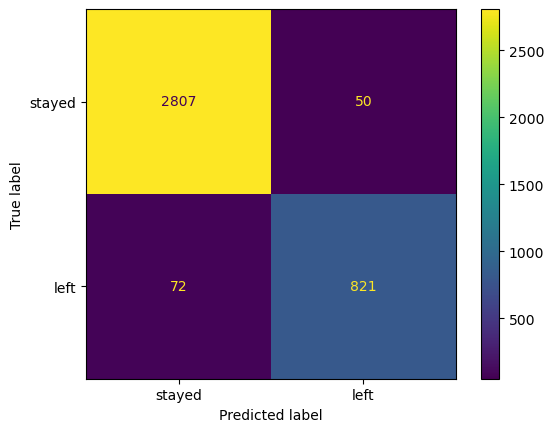

In [300]:
### Confusion Matrix ###

# Generate array of values for confusion matrix
rf2_preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, rf2_preds, labels=rf2.classes_)

# Plot Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['stayed', 'left'])
disp.plot()
plt.show()

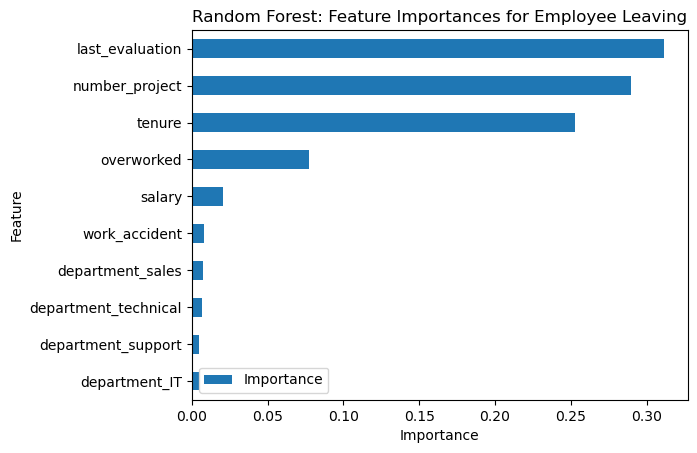

In [302]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The above plot shows that the most important features for determining whether an employee will leave are `last_evaluation`, `number_project`, `tenure`, and `overworked`. These features were shown to offer the most predictive power for the model to predict the target variable `left`.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Do you have any ethical considerations in this stage?



* The main insight drawn from this model is that employees appear to be overworked, both from a number of hours poerspective and a number of projects persepctive.
* The following business recommendations could be made:
  * Cap the number of projects an employee works on
  * Offer promotions yearly or every two years
  * Cap the number of monthly hours an employee can work, or reward them if they work extra hours
  * Reassess the evaluations that are given to employees, ensure everyone is getting a fair evaluation.
* The model is already quite high-performing, it may be possible to make small changes that minutely increase the performance of the model (i.e. new features, feature engineering, testing more hyperparameters, etc.), but it is likely not worth the trouble in this case.
* There are always ethical considerations, in this case, it is important to ensure the data remains anonymous.
  

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

After conducting feature engineering, the random forest model achieved AUC of 95.1%, precision of 94.3%, recall of 91.9%, f1-score of 93.1%, and accuracy of 96.7%, on the test set. 

### Conclusion, Recommendations, Next Steps

#### Conclusion
Based on the constructed model, employees being overworked appears to be the leading contributing factor to whether or not an employee leaves the company. The model had exceptional scores for each of the evaluation metrics confirming that this is indeed a strong predictive model.

#### Recommendations
As mentioned above the following recommendations can be made:
  * Cap the number of projects an employee works on
  * Offer promotions yearly or every two years
  * Cap the number of monthly hours an employee can work, or reward them if they work extra hours
  * Reassess the evaluations that are given to employees, ensure everyone is getting a fair evaluation.

Additionally, management can ask for additional feedback from their employees to assess if there are any cultural issues that may be contributing to employee turnover apart from the long work hours.

#### Next Steps
It may be possible that `last_evaluation` is a better predictor of whether or not an employee leaves (same with `satisfaction_score`). It may be build an additional model where `last_evaluation` is removed from the predictor variables or it may be useful to use `last_evaluation` as the target variable.

Additionally, it may be advantageous to remove the outliers from the data, specifically the tenure column, and attempt to create a model. It would be interesting to see if there are any noticeable differences when only modeling short-tenured employees which can be seen to exclusively contain workers who leave the company.